In [5]:
import os

#plot_save_path="C:\\Users\\e410675\\OneDrive - London South Bank University\\Desktop\\Plots"


plot_save_path="C:\\Users\\Jose Luis\\Desktop"


In [6]:
import pandas as pd

# Replace with the path to your Excel file
df = pd.read_excel("delayed_transfers_of_care_2010_2020_combined_data.xlsx")

# Show the first 5 rows
print(df.head())

df

  Org Code        Organisation Name  Delayed Transfer of Care Days Acute  \
0      5D7            Newcastle PCT                                  0.0   
1      5D8       North Tyneside PCT                                  0.0   
2      5KG       South Tyneside PCT                                  0.0   
3      5KL  Sunderland Teaching PCT                                  0.0   
4      5KM        Middlesbrough PCT                                  0.0   

   Delayed Transfer of Care Days Non-Acute  \
0                                    260.0   
1                                      0.0   
2                                      0.0   
3                                      0.0   
4                                      0.0   

   Delayed Transfer of Care Days Total  Year  Month Year-Month  \
0                                260.0  2010      8    2010-08   
1                                  0.0  2010      8    2010-08   
2                                  0.0  2010      8    2010-08   
3 

,Org Code,Organisation Name,Delayed Transfer of Care Days Acute,Delayed Transfer of Care Days Non-Acute,Delayed Transfer of Care Days Total,Year,Month,Year-Month,source file name
0,5D7,Newcastle PCT,0.0,260.0,260.0,2010,8,2010-08,Total Delayed Days Trust 2010-08.xls
1,5D8,North Tyneside PCT,0.0,0.0,0.0,2010,8,2010-08,Total Delayed Days Trust 2010-08.xls
2,5KG,South Tyneside PCT,0.0,0.0,0.0,2010,8,2010-08,Total Delayed Days Trust 2010-08.xls
3,5KL,Sunderland Teaching PCT,0.0,0.0,0.0,2010,8,2010-08,Total Delayed Days Trust 2010-08.xls
4,5KM,Middlesbrough PCT,0.0,0.0,0.0,2010,8,2010-08,Total Delayed Days Trust 2010-08.xls
...,...,...,...,...,...,...,...,...,...
27054,RA7,University Hospitals Bristol NHS Foundation Trust,790.0,217.0,1007.0,2020,2,2020-02,Total Delayed Days Trust 2020-02.xls
27055,RK9,Plymouth Hospitals NHS Trust,1191.0,0.0,1191.0,2020,2,2020-02,Total Delayed Days Trust 2020-02.xls
27056,RA3,Weston Area Health NHS Trust,272.0,0.0,272.0,2020,2,2020-02,Total Delayed Days Trust 2020-02.xls
27057,AXG,Wiltshire Health And Care,0.0,406.0,406.0,2020,2,2020-02,Total Delayed Days Trust 2020-02.xls


# Data analysis 

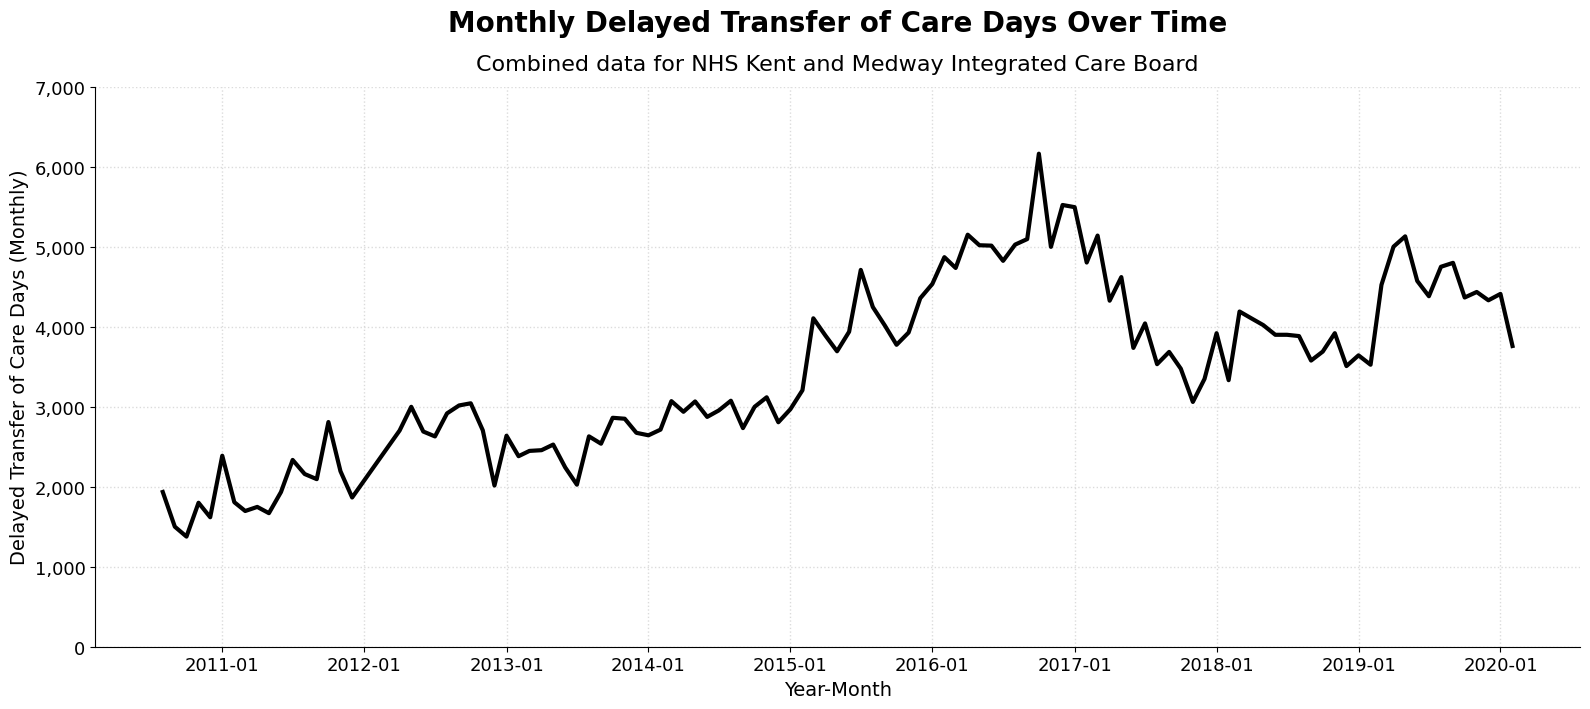

In [27]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.dates as mdates
import pandas as pd
import os

# === Parameters ===
target_organisations = [
    "Dartford And Gravesham NHS Trust",
    "East Kent Hospitals University NHS Foundation Trust",
    "Maidstone And Tunbridge Wells NHS Trust",
    "Medway NHS Foundation Trust",
    "Medway Community Healthcare",
    "Kent Community Health NHS Foundation Trust"

]

# === Filter and prepare data ===
filtered_df = df[df["Organisation Name"].isin(target_organisations)].copy()
filtered_df["Year-Month"] = pd.to_datetime(filtered_df["Year-Month"], format="%Y-%m")
filtered_df.sort_values(["Organisation Name", "Year-Month"], inplace=True)

# === Calculate total (no smoothing) ===
total_df = (
    filtered_df.groupby("Year-Month")["Delayed Transfer of Care Days Total"]
    .sum()
    .reset_index()
    .rename(columns={"Delayed Transfer of Care Days Total": "Total DTOC"})
)

# === Plot the raw total ===
fig, ax = plt.subplots(figsize=(16, 8))
fig.patch.set_facecolor('white')

ax.plot(
    total_df["Year-Month"],
    total_df["Total DTOC"],
    label="Total (All 5 Trusts)",
    color='black',
    linewidth=3,
    linestyle='-'
)

# === Y-axis ===
ax.set_ylabel("Delayed Transfer of Care Days (Monthly)", fontsize=14)
ax.set_ylim(0, 7000)
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f"{int(x):,}"))
ax.tick_params(axis='y', labelsize=13)

# === X-axis ===
ax.set_xlabel("Year-Month", fontsize=14)
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m"))
ax.tick_params(axis='x', rotation=0, labelsize=13)

# === Titles ===
ax.set_title(
    "Monthly Delayed Transfer of Care Days Over Time",
    fontsize=20,
    pad=40,
    weight='bold',
    loc='center'
)
ax.text(
    0.5, 1.03,
    "Combined data for NHS Kent and Medway Integrated Care Board",
    fontsize=16,
    ha='center',
    transform=ax.transAxes
)

# === Style ===
ax.grid(True, linestyle=':', linewidth=1, color='lightgrey', alpha=0.8)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# === Final Layout ===
plt.tight_layout(rect=[0, 0.1, 1, 1])

# === Save & Show ===
plt.savefig(os.path.join(plot_save_path, "A5-delayed_transfer_of_care_days_total_only_monthly.png"), bbox_inches='tight', dpi=300)
plt.show()


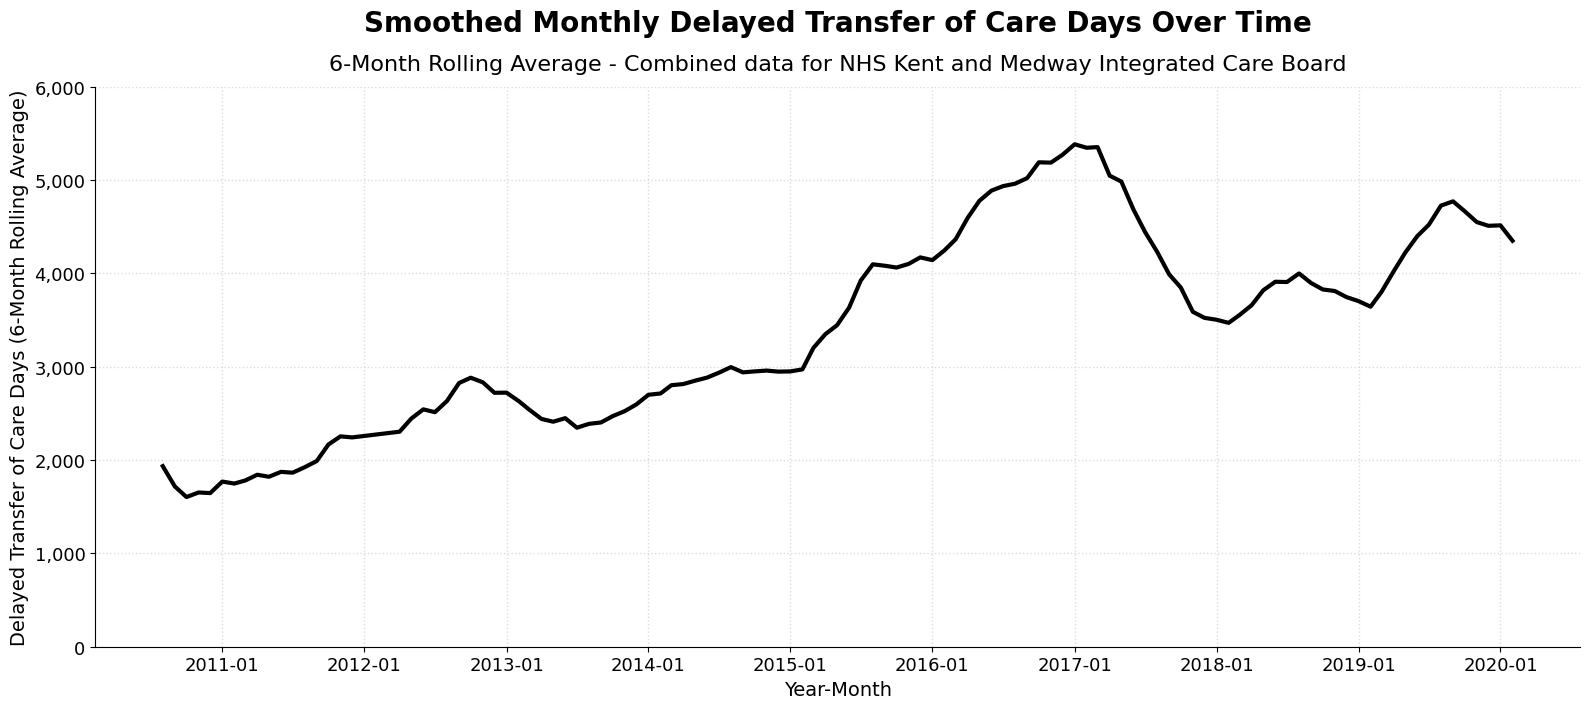

In [28]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.dates as mdates
import pandas as pd
import os

# === Parameters ===
target_organisations = [
     "Dartford And Gravesham NHS Trust",
    "East Kent Hospitals University NHS Foundation Trust",
    "Maidstone And Tunbridge Wells NHS Trust",
    "Medway NHS Foundation Trust",
    "Medway Community Healthcare",
    "Kent Community Health NHS Foundation Trust"
]

# === Filter and prepare data ===
filtered_df = df[df["Organisation Name"].isin(target_organisations)].copy()
filtered_df["Year-Month"] = pd.to_datetime(filtered_df["Year-Month"], format="%Y-%m")
filtered_df.sort_values(["Organisation Name", "Year-Month"], inplace=True)

# === Calculate total across all selected trusts ===
total_df = (
    filtered_df.groupby("Year-Month")["Delayed Transfer of Care Days Total"]
    .sum()
    .reset_index()
    .rename(columns={"Delayed Transfer of Care Days Total": "Total DTOC"})
)
total_df["Smoothed Total DTOC"] = total_df["Total DTOC"].rolling(window=6, min_periods=1).mean()

# === Plot only the total ===
fig, ax = plt.subplots(figsize=(16, 8))
fig.patch.set_facecolor('white')

ax.plot(
    total_df["Year-Month"],
    total_df["Smoothed Total DTOC"],
    label="Total (All 5 Trusts)",
    color='black',
    linewidth=3,
    linestyle='-'
)

# === Y-axis ===
ax.set_ylabel("Delayed Transfer of Care Days (6-Month Rolling Average)", fontsize=14)
ax.set_ylim(0000, 6000)  # <<< Set fixed Y-axis limits
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f"{int(x):,}"))
ax.tick_params(axis='y', labelsize=13)

# === X-axis ===
ax.set_xlabel("Year-Month", fontsize=14)
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m"))
ax.tick_params(axis='x', rotation=0, labelsize=13)

# === Titles ===
ax.set_title(
    "Smoothed Monthly Delayed Transfer of Care Days Over Time",
    fontsize=20,
    pad=40,
    weight='bold',
    loc='center'
)
ax.text(
    0.5, 1.03,
    "6-Month Rolling Average - Combined data for NHS Kent and Medway Integrated Care Board",
    fontsize=16,
    ha='center',
    transform=ax.transAxes
)

# === Style ===
ax.grid(True, linestyle=':', linewidth=1, color='lightgrey', alpha=0.8)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# === Final Layout ===
plt.tight_layout(rect=[0, 0.1, 1, 1])

# === Save & Show ===
plt.savefig(os.path.join(plot_save_path, "A6-delayed_transfer_of_care_days_total_only_6m_fixed_ylim.png"), bbox_inches='tight', dpi=300)
plt.show()


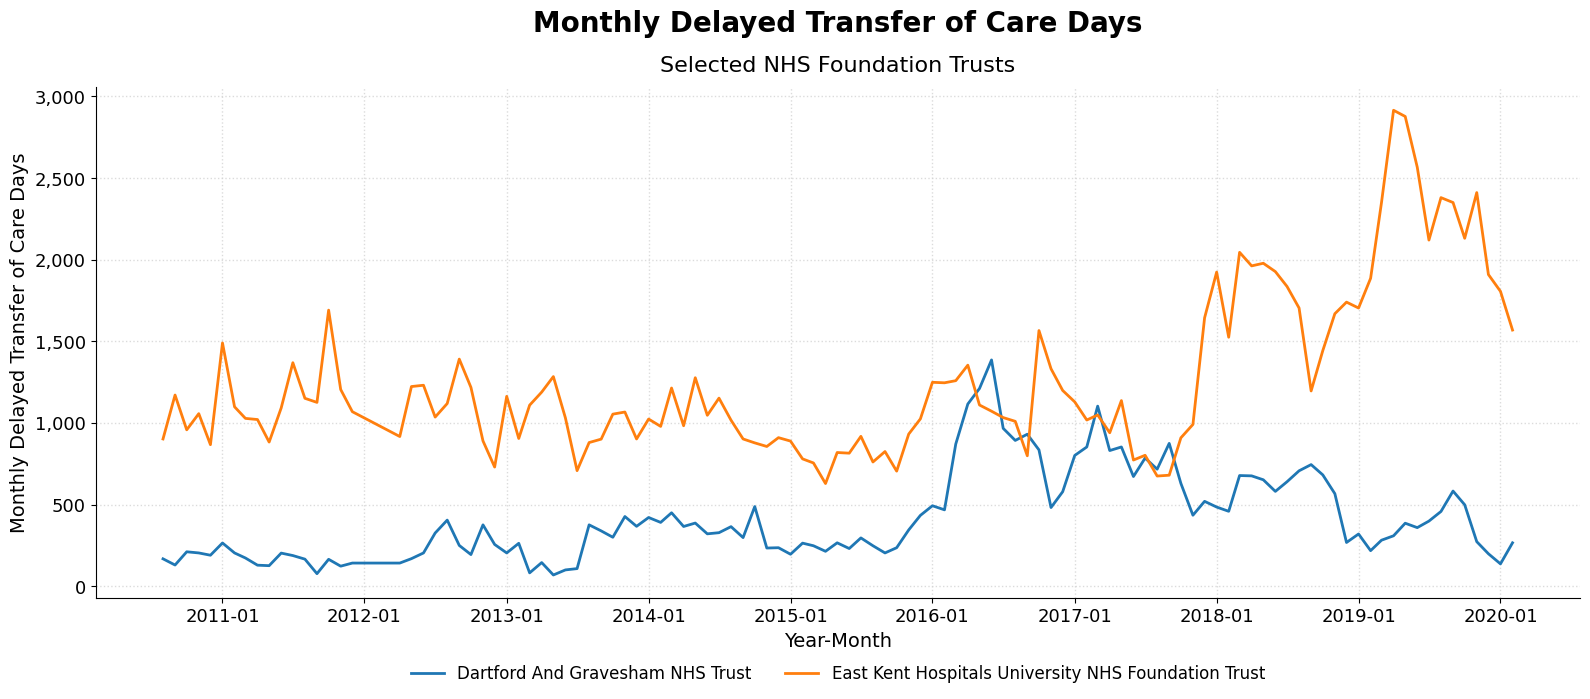

In [29]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.dates as mdates
import matplotlib.cm as cm
import pandas as pd
import os

# === Parameters ===
target_organisations = [
    "Dartford And Gravesham NHS Trust",
    "East Kent Hospitals University NHS Foundation Trust",

]

# === Filter and prepare data ===
filtered_df = df[df["Organisation Name"].isin(target_organisations)].copy()
filtered_df["Year-Month"] = pd.to_datetime(filtered_df["Year-Month"], format="%Y-%m")
filtered_df.sort_values("Year-Month", inplace=True)

# === Plot ===
fig, ax = plt.subplots(figsize=(16, 8))
fig.patch.set_facecolor('white')
tab10 = plt.get_cmap('tab10')

for idx, org in enumerate(target_organisations):
    org_data = filtered_df[filtered_df["Organisation Name"] == org].copy()
    ax.plot(
        org_data["Year-Month"],
        org_data["Delayed Transfer of Care Days Total"],
        label=org,
        color=tab10(idx),
        linewidth=2,
        linestyle='-'
    )

# === Y-axis ===
ax.set_ylabel("Monthly Delayed Transfer of Care Days", fontsize=14)
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f"{int(x):,}"))
ax.tick_params(axis='y', labelsize=13)

# === X-axis ===
ax.set_xlabel("Year-Month", fontsize=14)
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m"))
ax.tick_params(axis='x', rotation=0, labelsize=13)

# === Titles ===
ax.set_title(
    "Monthly Delayed Transfer of Care Days",
    fontsize=20,
    pad=40,
    weight='bold',
    loc='center'
)
ax.text(
    0.5, 1.03,
    "Selected NHS Foundation Trusts",
    fontsize=16,
    ha='center',
    transform=ax.transAxes
)

# === Style ===
ax.grid(True, linestyle=':', linewidth=1, color='lightgrey', alpha=0.8)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# === Legend ===
plt.legend(
    fontsize=12,
    loc='upper center',
    bbox_to_anchor=(0.5, -0.1),
    ncol=2,
    frameon=False
)

# === Final Layout ===
plt.tight_layout(rect=[0, 0.1, 1, 1])

# === Save & Show ===
# Uncomment to save
plt.savefig(os.path.join(plot_save_path, "delayed_transfer_of_care_days_total.png"), bbox_inches='tight', dpi=300)
plt.show()


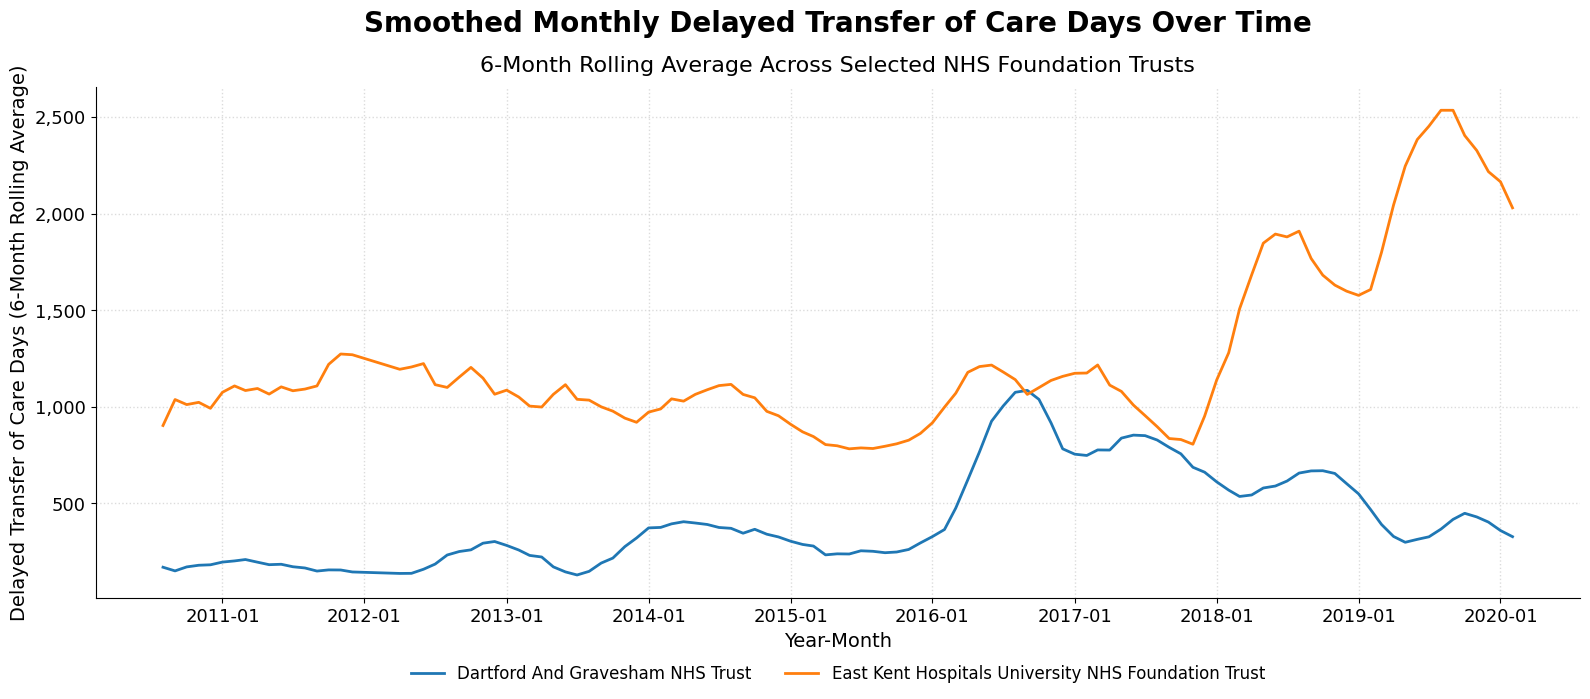

In [30]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.dates as mdates
import matplotlib.cm as cm
import pandas as pd
import os

# === Parameters ===
target_organisations = [
      "Dartford And Gravesham NHS Trust",
    "East Kent Hospitals University NHS Foundation Trust",
]

# === Filter and prepare data ===
filtered_df = df[df["Organisation Name"].isin(target_organisations)].copy()
filtered_df["Year-Month"] = pd.to_datetime(filtered_df["Year-Month"], format="%Y-%m")
filtered_df.sort_values(["Organisation Name", "Year-Month"], inplace=True)

# === Apply 6-month rolling average ===
filtered_df["Smoothed DTOC"] = (
    filtered_df.groupby("Organisation Name")["Delayed Transfer of Care Days Total"]
    .transform(lambda x: x.rolling(window=6, min_periods=1).mean())
)

# === Plot ===
fig, ax = plt.subplots(figsize=(16, 8))
fig.patch.set_facecolor('white')
tab10 = plt.get_cmap('tab10')

for idx, org in enumerate(target_organisations):
    org_data = filtered_df[filtered_df["Organisation Name"] == org].copy()
    ax.plot(
        org_data["Year-Month"],
        org_data["Smoothed DTOC"],
        label=org,
        color=tab10(idx),
        linewidth=2,
        linestyle='-'
    )

# === Y-axis ===
ax.set_ylabel("Delayed Transfer of Care Days (6-Month Rolling Average)", fontsize=14)
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f"{int(x):,}"))
ax.tick_params(axis='y', labelsize=13)

# === X-axis ===
ax.set_xlabel("Year-Month", fontsize=14)
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m"))
ax.tick_params(axis='x', rotation=0, labelsize=13)

# === Titles ===
ax.set_title(
    "Smoothed Monthly Delayed Transfer of Care Days Over Time",
    fontsize=20,
    pad=40,
    weight='bold',
    loc='center'
)
ax.text(
    0.5, 1.03,
    "6-Month Rolling Average Across Selected NHS Foundation Trusts",
    fontsize=16,
    ha='center',
    transform=ax.transAxes
)

# === Style ===
ax.grid(True, linestyle=':', linewidth=1, color='lightgrey', alpha=0.8)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# === Legend ===
plt.legend(
    fontsize=12,
    loc='upper center',
    bbox_to_anchor=(0.5, -0.1),
    ncol=2,
    frameon=False
)

# === Final Layout ===
plt.tight_layout(rect=[0, 0.1, 1, 1])

# === Save & Show ===
plt.savefig(os.path.join(plot_save_path, "delayed_transfer_of_care_days_total_smoothed_6m.png"), bbox_inches='tight', dpi=300)
plt.show()


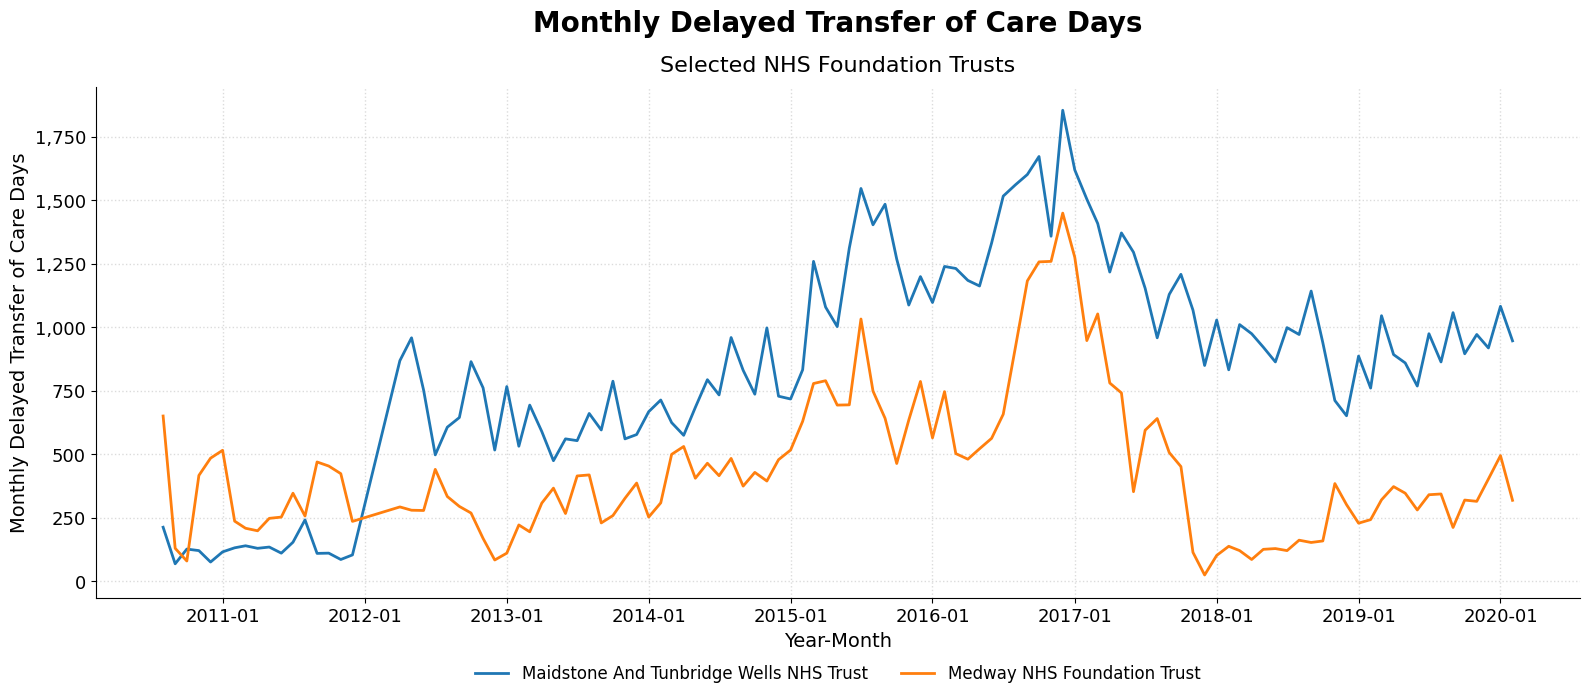

In [34]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.dates as mdates
import matplotlib.cm as cm
import pandas as pd
import os

# === Parameters ===
target_organisations = [
    "Maidstone And Tunbridge Wells NHS Trust",
    "Medway NHS Foundation Trust"
]

# === Filter and prepare data ===
filtered_df = df[df["Organisation Name"].isin(target_organisations)].copy()
filtered_df["Year-Month"] = pd.to_datetime(filtered_df["Year-Month"], format="%Y-%m")
filtered_df.sort_values("Year-Month", inplace=True)

# === Plot ===
fig, ax = plt.subplots(figsize=(16, 8))
fig.patch.set_facecolor('white')
tab10 = plt.get_cmap('tab10')

for idx, org in enumerate(target_organisations):
    org_data = filtered_df[filtered_df["Organisation Name"] == org].copy()
    ax.plot(
        org_data["Year-Month"],
        org_data["Delayed Transfer of Care Days Total"],
        label=org,
        color=tab10(idx),
        linewidth=2,
        linestyle='-'
    )

# === Y-axis ===
ax.set_ylabel("Monthly Delayed Transfer of Care Days", fontsize=14)
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f"{int(x):,}"))
ax.tick_params(axis='y', labelsize=13)

# === X-axis ===
ax.set_xlabel("Year-Month", fontsize=14)
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m"))
ax.tick_params(axis='x', rotation=0, labelsize=13)

# === Titles ===
ax.set_title(
    "Monthly Delayed Transfer of Care Days",
    fontsize=20,
    pad=40,
    weight='bold',
    loc='center'
)
ax.text(
    0.5, 1.03,
    "Selected NHS Foundation Trusts",
    fontsize=16,
    ha='center',
    transform=ax.transAxes
)

# === Style ===
ax.grid(True, linestyle=':', linewidth=1, color='lightgrey', alpha=0.8)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# === Legend ===
plt.legend(
    fontsize=12,
    loc='upper center',
    bbox_to_anchor=(0.5, -0.1),
    ncol=2,
    frameon=False
)

# === Final Layout ===
plt.tight_layout(rect=[0, 0.1, 1, 1])

# === Save & Show ===
# Uncomment to save
plt.savefig(os.path.join(plot_save_path, "delayed_transfer_of_care_days_total_a.png"), bbox_inches='tight', dpi=300)
plt.show()


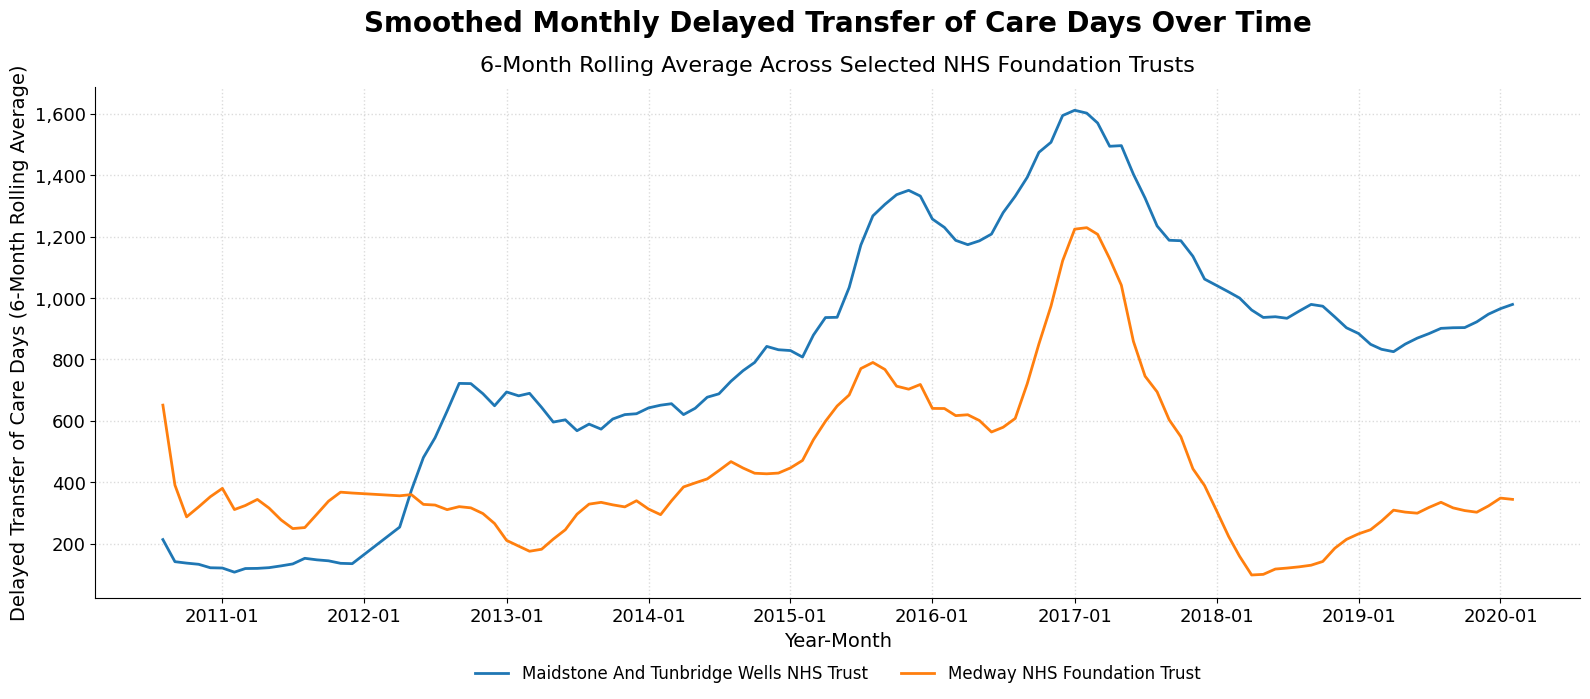

In [35]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.dates as mdates
import matplotlib.cm as cm
import pandas as pd
import os

# === Parameters ===
target_organisations = [
    "Maidstone And Tunbridge Wells NHS Trust",
    "Medway NHS Foundation Trust"
]

# === Filter and prepare data ===
filtered_df = df[df["Organisation Name"].isin(target_organisations)].copy()
filtered_df["Year-Month"] = pd.to_datetime(filtered_df["Year-Month"], format="%Y-%m")
filtered_df.sort_values(["Organisation Name", "Year-Month"], inplace=True)

# === Apply 6-month rolling average ===
filtered_df["Smoothed DTOC"] = (
    filtered_df.groupby("Organisation Name")["Delayed Transfer of Care Days Total"]
    .transform(lambda x: x.rolling(window=6, min_periods=1).mean())
)

# === Plot ===
fig, ax = plt.subplots(figsize=(16, 8))
fig.patch.set_facecolor('white')
tab10 = plt.get_cmap('tab10')

for idx, org in enumerate(target_organisations):
    org_data = filtered_df[filtered_df["Organisation Name"] == org].copy()
    ax.plot(
        org_data["Year-Month"],
        org_data["Smoothed DTOC"],
        label=org,
        color=tab10(idx),
        linewidth=2,
        linestyle='-'
    )

# === Y-axis ===
ax.set_ylabel("Delayed Transfer of Care Days (6-Month Rolling Average)", fontsize=14)
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f"{int(x):,}"))
ax.tick_params(axis='y', labelsize=13)

# === X-axis ===
ax.set_xlabel("Year-Month", fontsize=14)
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m"))
ax.tick_params(axis='x', rotation=0, labelsize=13)

# === Titles ===
ax.set_title(
    "Smoothed Monthly Delayed Transfer of Care Days Over Time",
    fontsize=20,
    pad=40,
    weight='bold',
    loc='center'
)
ax.text(
    0.5, 1.03,
    "6-Month Rolling Average Across Selected NHS Foundation Trusts",
    fontsize=16,
    ha='center',
    transform=ax.transAxes
)

# === Style ===
ax.grid(True, linestyle=':', linewidth=1, color='lightgrey', alpha=0.8)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# === Legend ===
plt.legend(
    fontsize=12,
    loc='upper center',
    bbox_to_anchor=(0.5, -0.1),
    ncol=2,
    frameon=False
)

# === Final Layout ===
plt.tight_layout(rect=[0, 0.1, 1, 1])

# === Save & Show ===
plt.savefig(os.path.join(plot_save_path, "delayed_transfer_of_care_daysx_total_smoothed_6m.png"), bbox_inches='tight', dpi=300)
plt.show()

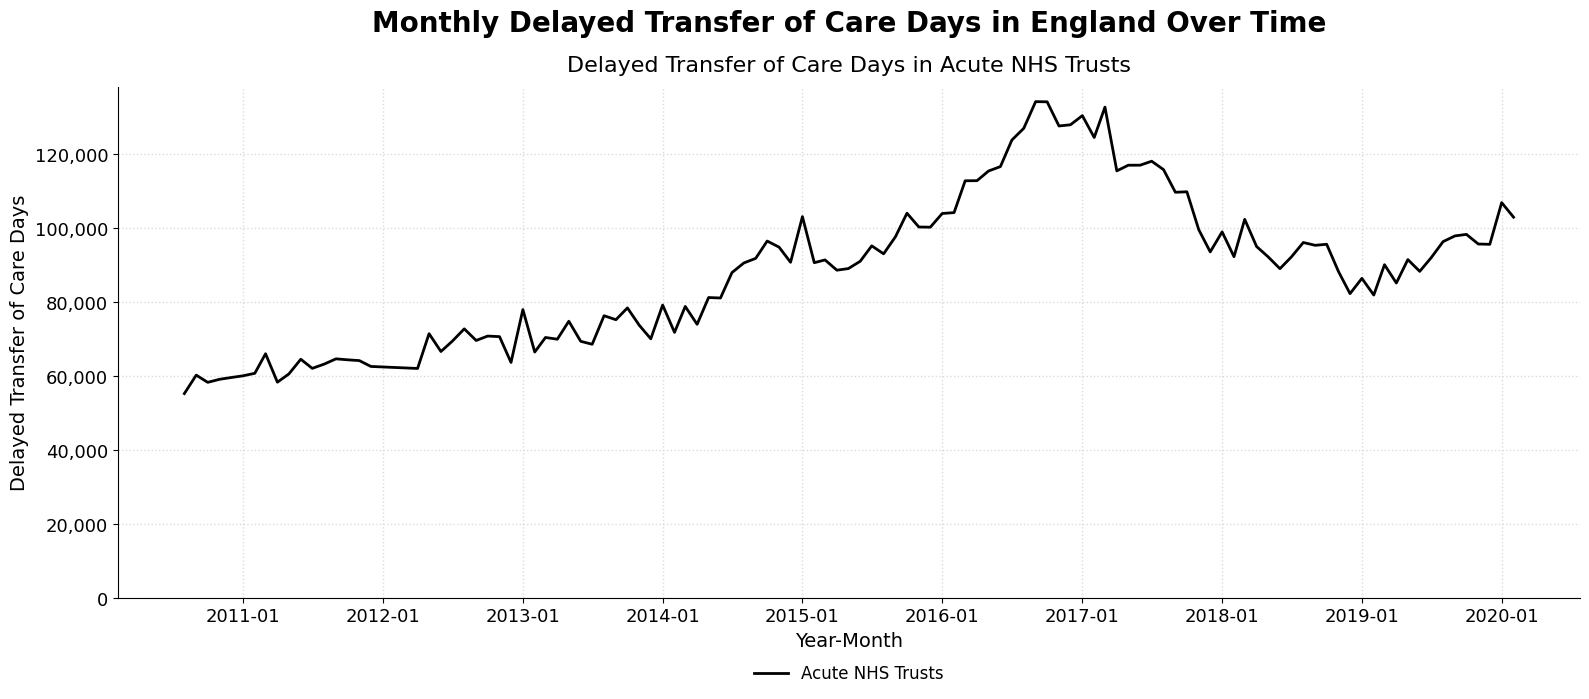

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.dates as mdates
import os

# === Load the data ===


# === Compute total national DTOC (no rolling average) ===
national_df = (
    df.groupby("Year-Month")["Delayed Transfer of Care Days Acute"]
    .sum()
    .reset_index(name="National DTOC")
)

# === Plotting ===
fig, ax = plt.subplots(figsize=(16, 8))
fig.patch.set_facecolor('white')

# Plot national total
ax.plot(
    national_df["Year-Month"],
    national_df["National DTOC"],
    label="Acute NHS Trusts",
    color='black',
    linewidth=2,
    linestyle="-"
)

# === Axis formatting ===
ax.set_ylabel("Delayed Transfer of Care Days", fontsize=14)
ax.set_xlabel("Year-Month", fontsize=14)
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f"{int(x):,}"))
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m"))
ax.tick_params(axis='x', rotation=0, labelsize=13)
ax.tick_params(axis='y', labelsize=13)

# === Start y-axis from 0 ===
ax.set_ylim(bottom=0)

# === Titles and subtitle ===
ax.set_title(
    "Monthly Delayed Transfer of Care Days in England Over Time",
    fontsize=20,
    pad=40,
    weight='bold'
)
ax.text(
    0.5, 1.03,
    "Delayed Transfer of Care Days in Acute NHS Trusts",
    fontsize=16,
    ha='center',
    transform=ax.transAxes
)

# === Style adjustments ===
ax.grid(True, linestyle=':', linewidth=1, color='lightgrey', alpha=0.8)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# === Legend ===
plt.legend(
    fontsize=12,
    loc='upper center',
    bbox_to_anchor=(0.5, -0.1),
    frameon=False
)

plt.tight_layout(rect=[0, 0.1, 1, 1])

# === Save & Show ===
plt.savefig(os.path.join(plot_save_path, "A1-national_dto_days_nosmoothing.png"), bbox_inches='tight', dpi=300)
plt.show()


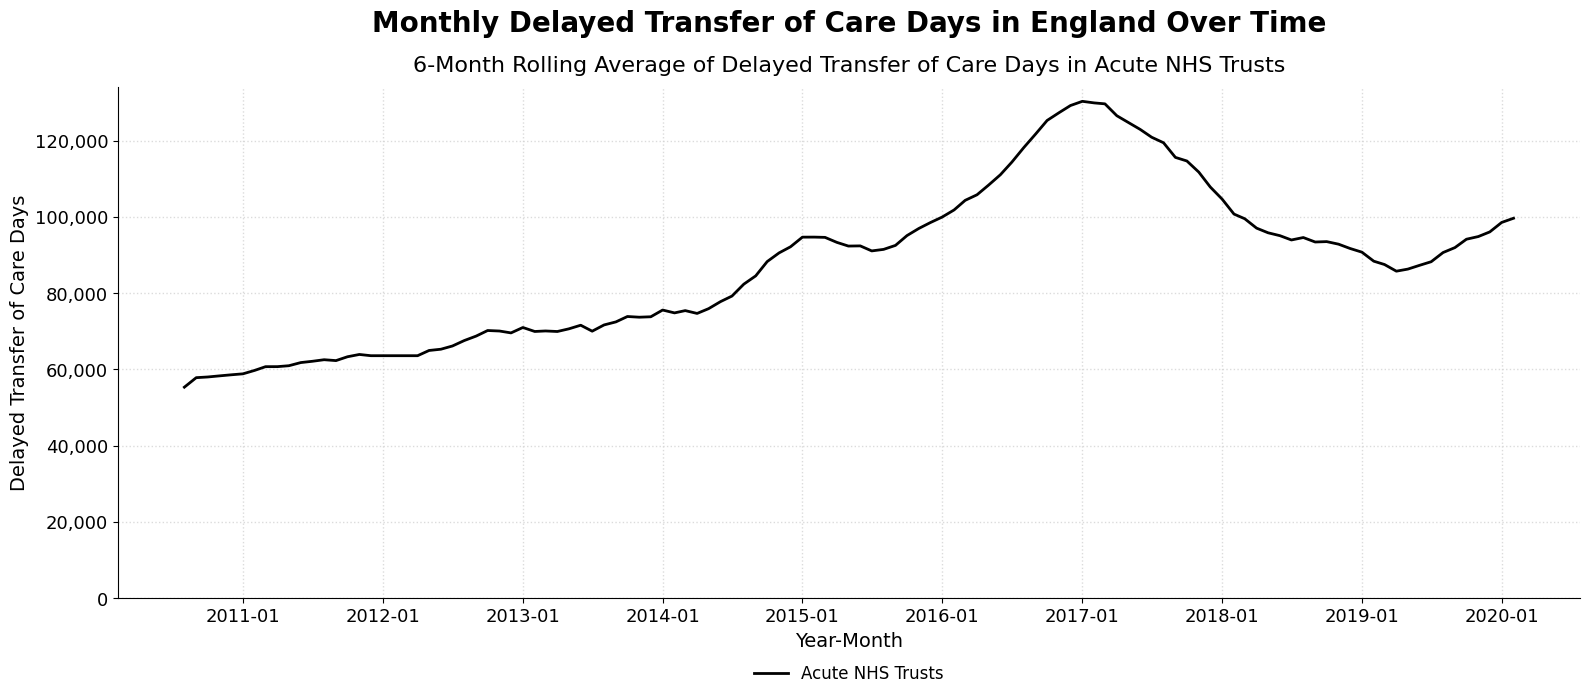

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.dates as mdates
import os

# === Load the data ===
# Example: df = pd.read_csv("your_data.csv")



# === Compute total national DTOC (6-month rolling average) ===
national_df = (
    df.groupby("Year-Month")["Delayed Transfer of Care Days Acute"]
    .sum()
    .rolling(window=6, min_periods=1)
    .mean()
    .reset_index(name="National Smoothed DTOC")
)

# === Plotting ===
fig, ax = plt.subplots(figsize=(16, 8))
fig.patch.set_facecolor('white')

# Plot national total
ax.plot(
    national_df["Year-Month"],
    national_df["National Smoothed DTOC"],
    label="Acute NHS Trusts",
    color='black',
    linewidth=2,
    linestyle="-"
)

# === Axis formatting ===
ax.set_ylabel("Delayed Transfer of Care Days", fontsize=14)
ax.set_xlabel("Year-Month", fontsize=14)
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f"{int(x):,}"))
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m"))
ax.tick_params(axis='x', rotation=0, labelsize=13)
ax.tick_params(axis='y', labelsize=13)

# === Start y-axis from 0 ===
ax.set_ylim(bottom=0)

# === Titles and subtitle ===
ax.set_title(
    "Monthly Delayed Transfer of Care Days in England Over Time",
    fontsize=20,
    pad=40,
    weight='bold'
)
ax.text(
    0.5, 1.03,
    "6-Month Rolling Average of Delayed Transfer of Care Days in Acute NHS Trusts",
    fontsize=16,
    ha='center',
    transform=ax.transAxes
)

# === Style adjustments ===
ax.grid(True, linestyle=':', linewidth=1, color='lightgrey', alpha=0.8)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# === Legend ===
plt.legend(
    fontsize=12,
    loc='upper center',
    bbox_to_anchor=(0.5, -0.1),
    frameon=False
)

plt.tight_layout(rect=[0, 0.1, 1, 1])

# === Save & Show ===
plt.savefig(os.path.join(plot_save_path, "A2-national_dto_days_smoothed_6m.png"), bbox_inches='tight', dpi=300)
plt.show()



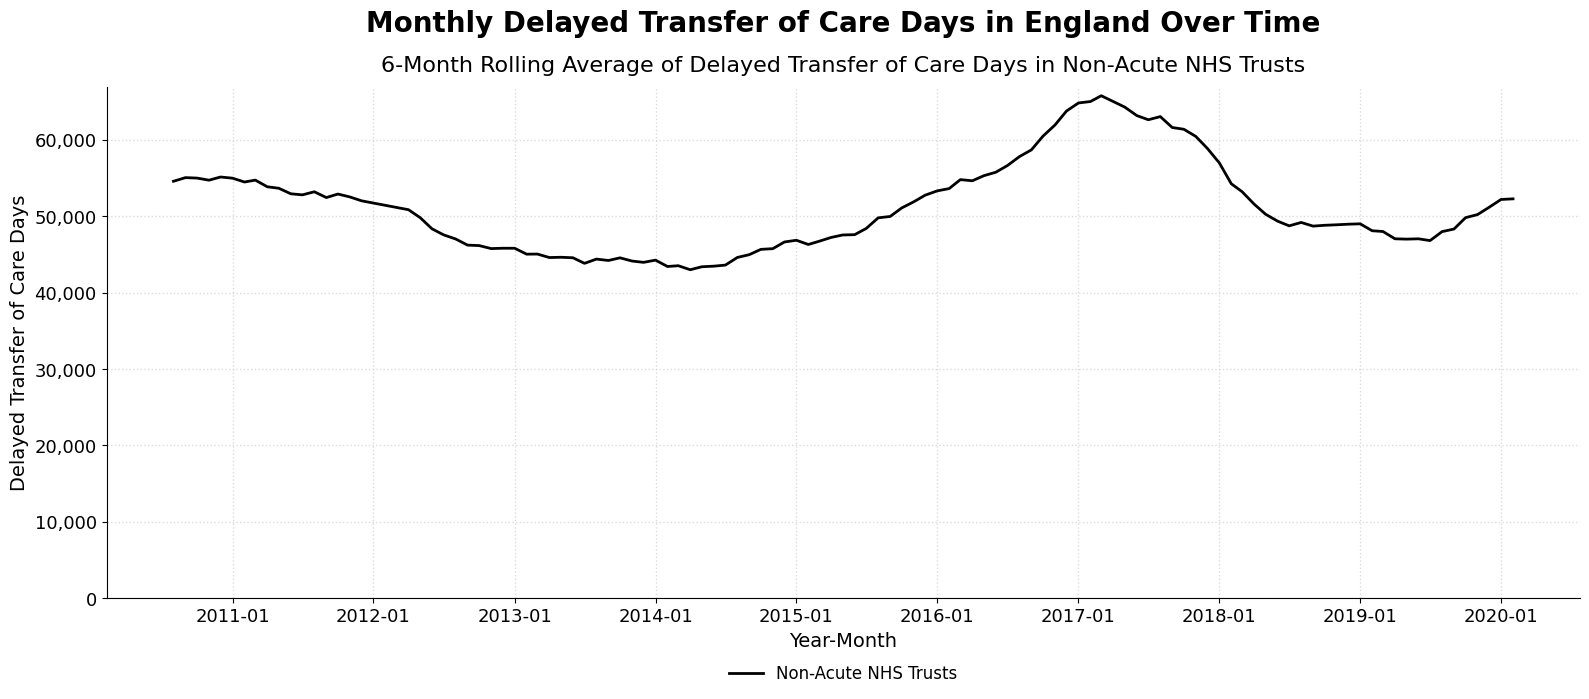

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.dates as mdates
import os

# === Load the data ===
# Example: df = pd.read_csv("your_data.csv")



# === Compute total national DTOC (6-month rolling average) ===
national_df = (
    df.groupby("Year-Month")["Delayed Transfer of Care Days Non-Acute"]
    .sum()
    .rolling(window=6, min_periods=1)
    .mean()
    .reset_index(name="National Smoothed DTOC")
)

# === Plotting ===
fig, ax = plt.subplots(figsize=(16, 8))
fig.patch.set_facecolor('white')

# Plot national total
ax.plot(
    national_df["Year-Month"],
    national_df["National Smoothed DTOC"],
    label="Non-Acute NHS Trusts",
    color='black',
    linewidth=2,
    linestyle="-"
)

# === Axis formatting ===
ax.set_ylabel("Delayed Transfer of Care Days", fontsize=14)
ax.set_xlabel("Year-Month", fontsize=14)
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f"{int(x):,}"))
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m"))
ax.tick_params(axis='x', rotation=0, labelsize=13)
ax.tick_params(axis='y', labelsize=13)

# === Start y-axis from 0 ===
ax.set_ylim(bottom=0)

# === Titles and subtitle ===
ax.set_title(
    "Monthly Delayed Transfer of Care Days in England Over Time",
    fontsize=20,
    pad=40,
    weight='bold'
)
ax.text(
    0.5, 1.03,
    "6-Month Rolling Average of Delayed Transfer of Care Days in Non-Acute NHS Trusts",
    fontsize=16,
    ha='center',
    transform=ax.transAxes
)

# === Style adjustments ===
ax.grid(True, linestyle=':', linewidth=1, color='lightgrey', alpha=0.8)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# === Legend ===
plt.legend(
    fontsize=12,
    loc='upper center',
    bbox_to_anchor=(0.5, -0.1),
    frameon=False
)

plt.tight_layout(rect=[0, 0.1, 1, 1])

# === Save & Show ===
plt.savefig(os.path.join(plot_save_path, "A4-national_dto_days_smoothed_6m1.png"), bbox_inches='tight', dpi=300)
plt.show()



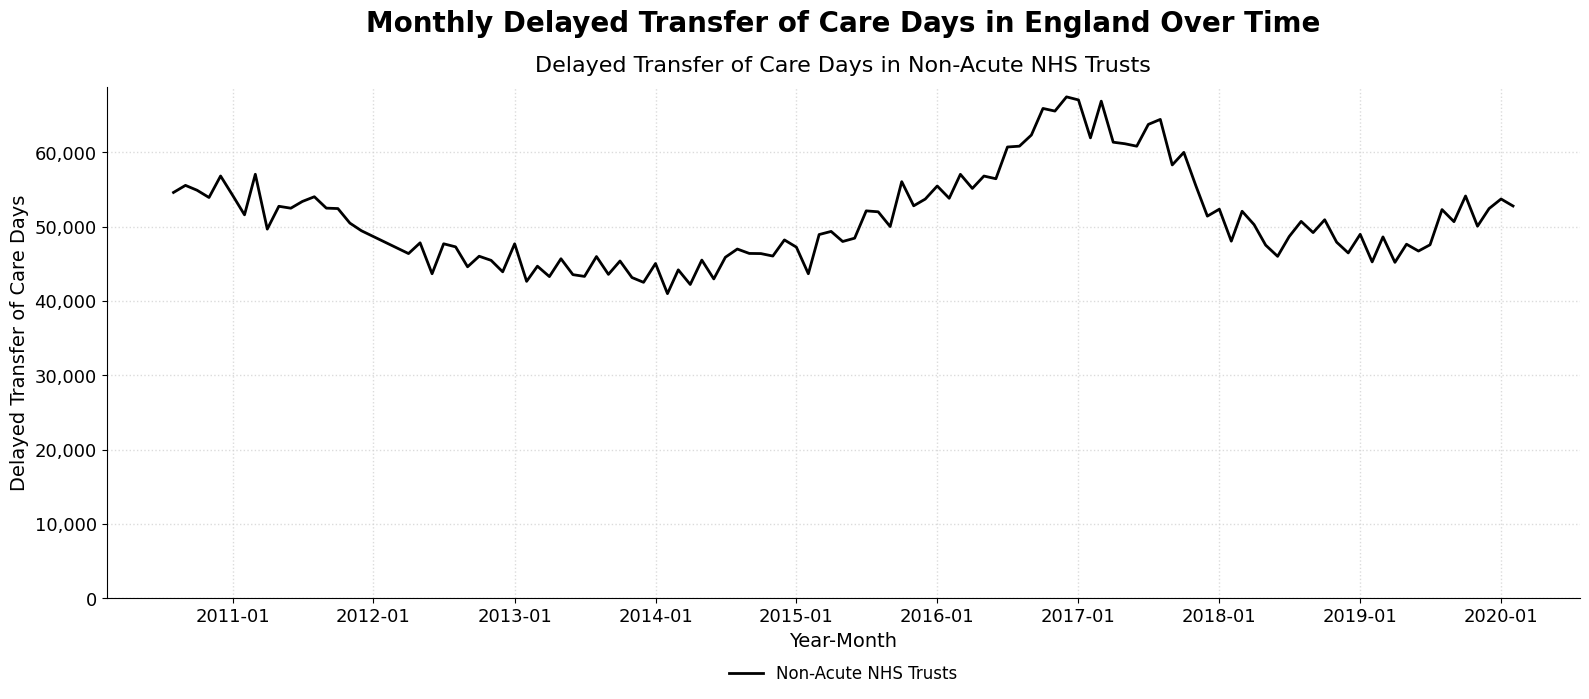

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.dates as mdates
import os

# === Load the data ===
# Example: df = pd.read_csv("your_data.csv")

# === Compute total national DTOC (no rolling average) ===
national_df = (
    df.groupby("Year-Month")["Delayed Transfer of Care Days Non-Acute"]
    .sum()
    .reset_index(name="National DTOC")
)

# === Plotting ===
fig, ax = plt.subplots(figsize=(16, 8))
fig.patch.set_facecolor('white')

# Plot national total
ax.plot(
    national_df["Year-Month"],
    national_df["National DTOC"],
    label="Non-Acute NHS Trusts",
    color='black',
    linewidth=2,
    linestyle="-"
)

# === Axis formatting ===
ax.set_ylabel("Delayed Transfer of Care Days", fontsize=14)
ax.set_xlabel("Year-Month", fontsize=14)
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f"{int(x):,}"))
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m"))
ax.tick_params(axis='x', rotation=0, labelsize=13)
ax.tick_params(axis='y', labelsize=13)

# === Start y-axis from 0 ===
ax.set_ylim(bottom=0)

# === Titles and subtitle ===
ax.set_title(
    "Monthly Delayed Transfer of Care Days in England Over Time",
    fontsize=20,
    pad=40,
    weight='bold'
)
ax.text(
    0.5, 1.03,
    "Delayed Transfer of Care Days in Non-Acute NHS Trusts",
    fontsize=16,
    ha='center',
    transform=ax.transAxes
)

# === Style adjustments ===
ax.grid(True, linestyle=':', linewidth=1, color='lightgrey', alpha=0.8)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# === Legend ===
plt.legend(
    fontsize=12,
    loc='upper center',
    bbox_to_anchor=(0.5, -0.1),
    frameon=False
)

plt.tight_layout(rect=[0, 0.1, 1, 1])

# === Save & Show ===
plt.savefig(os.path.join(plot_save_path, "A4-national_dto_days_nosmoothing_nonacute.png"), bbox_inches='tight', dpi=300)
plt.show()
